In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tinytorch.net

### Load dataset
Dataset has 10 cols of sensor readings (`float64`) and one col `target` for classification

In [2]:
df = pd.read_csv('sensors_data.csv', sep = ";")
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,target
0,38.29,38.29,38.29,38.29,38.29,38.29,38.66,38.66,38.66,38.66,1
1,39.03,38.66,39.03,39.03,39.03,39.03,39.03,39.03,39.03,39.03,1
2,39.41,39.41,39.41,39.41,39.41,39.41,39.78,39.41,39.78,39.78,1
3,39.78,39.78,39.78,39.78,40.15,40.15,40.15,40.15,40.15,40.15,1
4,40.52,40.52,40.52,40.52,40.52,40.52,40.52,40.52,40.52,40.52,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    4475 non-null   float64
 1   col2    4475 non-null   float64
 2   col3    4475 non-null   float64
 3   col4    4475 non-null   float64
 4   col5    4475 non-null   float64
 5   col6    4475 non-null   float64
 6   col7    4475 non-null   float64
 7   col8    4475 non-null   float64
 8   col9    4475 non-null   float64
 9   col10   4475 non-null   float64
 10  target  4475 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 384.7 KB


In [4]:
df.shape

(4475, 11)

In [5]:
df.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,target
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000
mean,40.242163,40.241703,40.243537,40.246246,40.254878,40.258060,40.256577,40.258404,40.269526,40.268711,0.148156
std,35.429036,35.429118,35.427647,35.427066,35.422751,35.422279,35.422088,35.423766,35.418881,35.420502,0.989074
min,1.130000,1.130000,1.130000,1.130000,1.130000,1.130000,1.130000,1.130000,1.130000,1.130000,-1.000000
25%,2.070000,2.070000,2.070000,2.070000,2.070000,2.070000,2.070000,2.070000,2.070000,2.070000,-1.000000
50%,35.060000,35.060000,35.060000,35.060000,35.060000,35.060000,35.060000,35.070000,35.060000,35.230000,1.000000
75%,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,1.000000
max,85.190000,85.190000,85.190000,85.190000,85.190000,85.190000,85.190000,85.190000,85.190000,85.190000,1.000000


### Absolute Max Normalization

In [6]:
for column in df.columns:
    df[column] = df[column]  / df[column].abs().max() 
df.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,target
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000
mean,0.472381,0.472376,0.472397,0.472429,0.472531,0.472568,0.472550,0.472572,0.472703,0.472693,0.148156
std,0.415883,0.415884,0.415866,0.415859,0.415809,0.415803,0.415801,0.415821,0.415763,0.415782,0.989074
min,0.013264,0.013264,0.013264,0.013264,0.013264,0.013264,0.013264,0.013264,0.013264,0.013264,-1.000000
25%,0.024299,0.024299,0.024299,0.024299,0.024299,0.024299,0.024299,0.024299,0.024299,0.024299,-1.000000
50%,0.411551,0.411551,0.411551,0.411551,0.411551,0.411551,0.411551,0.411668,0.411551,0.413546,1.000000
75%,0.939077,0.939077,0.939077,0.939077,0.939077,0.939077,0.939077,0.939077,0.939077,0.939077,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Split data into train and test
20% data is used for training

In [7]:
from sklearn.model_selection import train_test_split

trn, tst = train_test_split(df, test_size=0.8)

### Create the MLP
A neural network with 10-neuron input layer, 2x16 and 1x8 neuron intermidiate layers, and an output layer with one neuron is created.

In [8]:
neuralNetwork = tinytorch.net.MLP(10, [16, 16, 8, 1])
print(f"Number of parameters: {len(neuralNetwork.parameters())}")

Number of parameters: 593


### Training

In [9]:
gens = 10 # Number of generations
for gen in range(gens):

    batch_size = trn.shape[0]
    sample = trn.sample(n=batch_size)
    X = sample.drop('target', axis=1)
    Y = sample.target

    ypred = [neuralNetwork(list(row)) for _, row in X.iterrows()]

    loss = sum((ygt - yout)**2 for ygt, yout in zip(Y, ypred))
    print("Gen", gen+1, "- Loss:", loss.data)

    neuralNetwork.zero_grad()
    loss.backward()

    for p in neuralNetwork.parameters():
        p.data -= 1 * 1e-4 * p.grad



Gen 1  - Loss: 1041.2637943592322
Gen 2  - Loss: 204.87643069400406
Gen 3  - Loss: 145.77139517586656
Gen 4  - Loss: 136.46340671356083
Gen 5  - Loss: 131.35392110137897
Gen 6  - Loss: 127.97488969442368
Gen 7  - Loss: 125.56340913524421
Gen 8  - Loss: 123.75492855319106
Gen 9  - Loss: 122.34908912425716
Gen 10  - Loss: 121.22589694944404


### Testing and validation

In [10]:
X_tst = tst.drop('target', axis=1)
Y_tst = tst.target

preds = []

for i, row in X_tst.iterrows():
    pred = neuralNetwork(list(row))
    gt = Y_tst[i]
    preds.append(pred.data)

tp = 0
fp = 0
tn = 0
fn = 0

avg_conf = 0

for gt, pred in zip(Y_tst, preds):
    if gt == 1 and pred > 0:
        tp += 1; avg_conf += abs(pred)
    elif gt == -1 and pred < 0:
        tn += 1; avg_conf += abs(pred)
    elif gt == 1 and pred < 0:
        fn += 1
    elif gt == -1 and pred > 0:
        fp += 1

### Results

Accuracy: 0.9631284916201117
Precision: 0.9733990147783251
Recall: 0.9620253164556962
Error: 0.03687150837988827
[[1472, 54], [78, 1976]]


<Axes: >

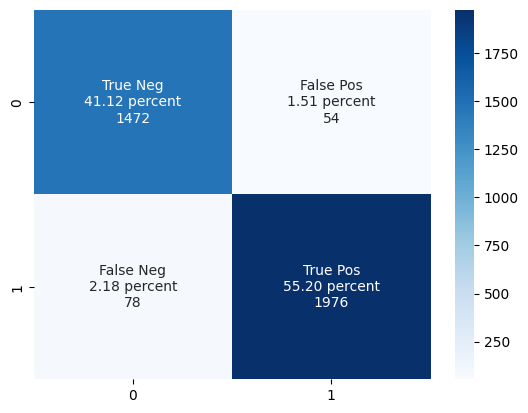

In [14]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
error = (fp + fn) / (tp + tn + fp + fn)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Error:", error)

total = tp + tn + fp + fn

group_names = [['True Neg\n%.2f percent\n%d' % (tn * 100 / total, tn),'False Pos\n%.2f percent\n%d' % (fp * 100 / total, fp)],
               ['False Neg\n%.2f percent\n%d' % (fn * 100 / total, fn),'True Pos\n%.2f percent\n%d' % (tp * 100 / total, tp)]]
cf_matrix = [[tn, fp], [fn, tp]]

percentages = ["{0:.2%}".format(value) for value in np.array(cf_matrix).flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, percentages)]
print(cf_matrix)
sns.heatmap(cf_matrix, annot=group_names, fmt='', cmap='Blues')

In [19]:
params = list(map(lambda x: x.data, neuralNetwork.parameters()))